In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('C:/Users/nilas/OneDrive/Documents/IDS_Project/cap5771sp25-project/Data/merged_movies_dataset_full.csv')

C:\Users\nilas\AppData\Local\Temp\ipykernel_34768\2212076867.py:1: DtypeWarning: Columns (2,3,5,7,8,11,12,13,14,15,16,17,18,19,20,22,42) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('C:/Users/nilas/OneDrive/Documents/IDS_Project/cap5771sp25-project/Data/merged_movies_dataset_full.csv')


In [3]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding for categorical features
# 'Certificate' and 'original_language' are categorical features
for col in ['Certificate', 'original_language']:
    if col in df.columns:
        df[col] = df[col].astype(str)  # Convert to string to avoid issues
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        print(f"Encoded '{col}' — Classes: {le.classes_}")
    else:
        print(f"Column '{col}' not found in DataFrame.")



Encoded 'Certificate' — Classes: ['A' 'Approved' 'G' 'GP' 'NC-17' 'Not Rated' 'PG' 'PG-13' 'Passed' 'R'
 'TV-14' 'TV-MA' 'TV-PG' 'U' 'U/A' 'UA' 'Unrated' 'X' 'nan']
Encoded 'original_language' — Classes: ['aa' 'ab' 'af' 'ak' 'am' 'an' 'ar' 'as' 'av' 'ay' 'az' 'ba' 'be' 'bg'
 'bi' 'bm' 'bn' 'bo' 'br' 'bs' 'ca' 'ce' 'ch' 'cn' 'co' 'cr' 'cs' 'cv'
 'cy' 'da' 'de' 'dv' 'dz' 'el' 'en' 'eo' 'es' 'et' 'eu' 'fa' 'ff' 'fi'
 'fj' 'fo' 'fr' 'fy' 'ga' 'gd' 'gl' 'gn' 'gu' 'gv' 'ha' 'he' 'hi' 'hr'
 'ht' 'hu' 'hy' 'hz' 'ia' 'id' 'ie' 'ig' 'ii' 'ik' 'is' 'it' 'iu' 'ja'
 'jv' 'ka' 'kg' 'ki' 'kj' 'kk' 'kl' 'km' 'kn' 'ko' 'ks' 'ku' 'kv' 'kw'
 'ky' 'la' 'lb' 'lg' 'li' 'ln' 'lo' 'lt' 'lv' 'mg' 'mh' 'mi' 'mk' 'ml'
 'mn' 'mo' 'mr' 'ms' 'mt' 'my' 'nb' 'nd' 'ne' 'nl' 'nn' 'no' 'nr' 'nv'
 'ny' 'oc' 'oj' 'om' 'or' 'os' 'pa' 'pi' 'pl' 'ps' 'pt' 'qu' 'rm' 'rn'
 'ro' 'ru' 'rw' 'sa' 'sc' 'sd' 'se' 'sg' 'sh' 'si' 'sk' 'sl' 'sm' 'sn'
 'so' 'sq' 'sr' 'ss' 'st' 'su' 'sv' 'sw' 'ta' 'te' 'tg' 'th' 'ti' 'tk'
 'tl' 'tn' 'to'

In [4]:
target = 'IMDB_Rating'
# Correlation matrix with target
numerical_df = df.select_dtypes(include='number')
correlation = numerical_df.corr()[target].sort_values(ascending=False)

print("Top correlated features with IMDB_Rating:")
print(correlation.drop(target).head(10))  # Exclude self-correlation


Top correlated features with IMDB_Rating:
Meta_score           0.250244
AverageRating        0.174890
vote_count           0.162570
revenue              0.111096
Certificate          0.085950
budget               0.085529
popularity           0.023756
id                   0.012577
runtime              0.007395
original_language   -0.000623
Name: IMDB_Rating, dtype: float64


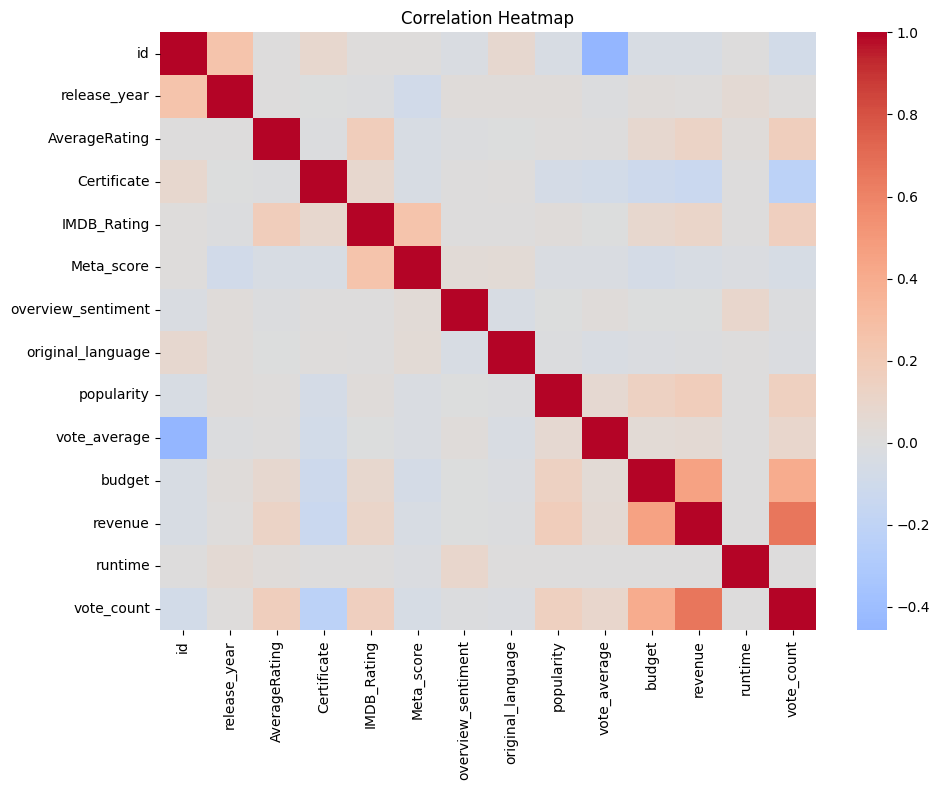

In [5]:
#visualizing the correlation matrix for easy interpretation
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(numerical_df.corr(), cmap='coolwarm', center=0, annot=False)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()


In [6]:
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest

# Example: convert IMDB_Rating to categories (low/medium/high)
df['rating_category'] = pd.cut(df['IMDB_Rating'], bins=[0, 5.5, 7.0, 10],
                               labels=['Low', 'Medium', 'High'])

# Encode category
label_enc = LabelEncoder()
y_cat = label_enc.fit_transform(df['rating_category'])

# label encoded features
X_cat = df[['Certificate', 'original_language', 'status']]

# Convert to numeric (ensure no string)
X_cat = X_cat.apply(LabelEncoder().fit_transform)

# Chi-square test
chi_scores = chi2(X_cat, y_cat)
chi_df = pd.DataFrame({'Feature': X_cat.columns, 'Chi2 Score': chi_scores[0], 'p-value': chi_scores[1]})
chi_df = chi_df.sort_values(by='Chi2 Score', ascending=False)

print("Chi-square scores:")
print(chi_df)


Chi-square scores:
             Feature     Chi2 Score   p-value
0        Certificate  172609.738608  0.000000
1  original_language    8358.649176  0.000000
2             status       3.364434  0.338775


In [7]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Select numeric features (excluding the target)
X_numeric = df.select_dtypes(include='number').drop(columns=['IMDB_Rating'])

# Fill missing values with column means
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X_numeric)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Apply PCA (retain 95% variance)
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

# Output results
print(f"Original feature count: {X_numeric.shape[1]}")
print(f"Reduced feature count with PCA: {X_pca.shape[1]}")


Original feature count: 13
Reduced feature count with PCA: 12


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [9]:
X_full = df.select_dtypes(include='number').copy()
y_full = df['IMDB_Rating']

# Drop missing target rows
valid_idx = y_full.notna()
X = X_full.loc[valid_idx]
y = y_full.loc[valid_idx]


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Impute
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [12]:
# Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)


In [13]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Support Vector Machine': SVR(),
    'Neural Network (MLP)': MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=300, random_state=42)
}

In [14]:
# Train & evaluate
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    predictions = model.predict(X_test_scaled)

    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, predictions)

    print(f"\n{name}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R² Score: {r2:.4f}")


Linear Regression
RMSE: 0.0000
R² Score: 1.0000

Decision Tree
RMSE: 0.0033
R² Score: 1.0000

Random Forest
RMSE: 0.0035
R² Score: 1.0000

Support Vector Machine
RMSE: 0.1003
R² Score: 0.9890

Neural Network (MLP)
RMSE: 0.0485
R² Score: 0.9974


In [15]:
# List numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
print("Numeric columns:", numeric_cols)

# Peek at the data types and unique value counts
for col in numeric_cols:
    unique_vals = df[col].nunique()
    print(f"{col}: {unique_vals} unique values")


Numeric columns: ['id', 'release_year', 'AverageRating', 'Certificate', 'IMDB_Rating', 'Meta_score', 'overview_sentiment', 'original_language', 'popularity', 'vote_average', 'budget', 'revenue', 'runtime', 'vote_count']
id: 1188909 unique values
release_year: 163 unique values
AverageRating: 68 unique values
Certificate: 19 unique values
IMDB_Rating: 73 unique values
Meta_score: 61 unique values
overview_sentiment: 70469 unique values
original_language: 175 unique values
popularity: 21701 unique values
vote_average: 3494 unique values
budget: 5827 unique values
revenue: 13992 unique values
runtime: 775 unique values
vote_count: 3547 unique values


In [16]:
# Convert continuous ratings to categories
df['rating_class'] = pd.cut(df['IMDB_Rating'],
                            bins=[0, 5.5, 7.0, 10],
                            labels=['Low', 'Medium', 'High'])


In [17]:
from sklearn.model_selection import train_test_split

# Use numeric features
X = df.select_dtypes(include='number').drop(columns=['IMDB_Rating'])
y = df['rating_class']

# Drop missing targets
valid_idx = y.notna()
X = X.loc[valid_idx]
y = y.loc[valid_idx]

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)


In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))

# Classification Report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Accuracy: 0.643295079390033
Precision: 0.6426886641260913
Recall: 0.643295079390033
F1 Score: 0.5953997646198549

Classification Report:

              precision    recall  f1-score   support

        High       0.74      0.47      0.57      2055
         Low       0.50      0.07      0.13       926
      Medium       0.62      0.91      0.74      3380

    accuracy                           0.64      6361
   macro avg       0.62      0.48      0.48      6361
weighted avg       0.64      0.64      0.60      6361



In [19]:
for name, model in models.items():
    print(f"{name} type: {type(model)}")


Linear Regression type: <class 'sklearn.linear_model._base.LinearRegression'>
Decision Tree type: <class 'sklearn.tree._classes.DecisionTreeRegressor'>
Random Forest type: <class 'sklearn.ensemble._forest.RandomForestRegressor'>
Support Vector Machine type: <class 'sklearn.svm._classes.SVR'>
Neural Network (MLP) type: <class 'sklearn.neural_network._multilayer_perceptron.MLPRegressor'>


In [21]:
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV




In [22]:
# Load your training data
X_train = joblib.load("C:/Users/nilas/cap5771sp25-project/script/X_train.pkl")
y_train = joblib.load("C:/Users/nilas/cap5771sp25-project/script/y_train.pkl")



In [23]:
# Define the classifier
rf_clf = RandomForestClassifier(random_state=42)

# Optional: Hyperparameter tuning with GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=1, scoring='accuracy')

grid_search.fit(X_train, y_train)

# Get the best model
best_rf = grid_search.best_estimator_



Fitting 5 folds for each of 48 candidates, totalling 240 fits


In [25]:
# Save the model
joblib.dump(best_rf, "C:/Users/nilas/cap5771sp25-project/random_forest_model.pkl")
print("✅ Random Forest Classifier trained and saved!")

✅ Random Forest Classifier trained and saved!


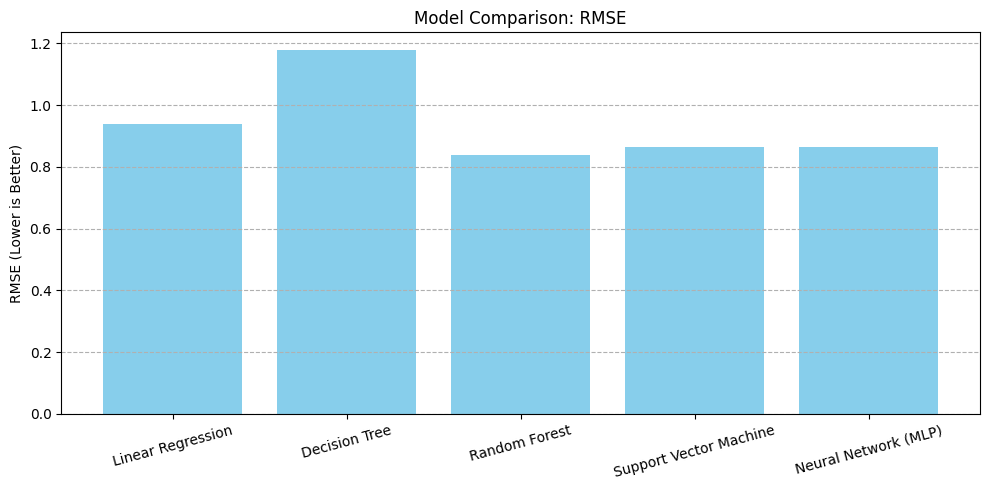

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Select numeric features and target
X = df.select_dtypes(include='number').drop(columns=['IMDB_Rating'])
y = df['IMDB_Rating'].dropna()

# Align features to y
X = X.loc[y.index]

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Support Vector Machine': SVR(),
    'Neural Network (MLP)': MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=300, random_state=42)
}

# Store results
model_names = []
rmse_scores = []
r2_scores = []

# Evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, predictions)

    model_names.append(name)
    rmse_scores.append(rmse)
    r2_scores.append(r2)

# --- Plot RMSE ---
plt.figure(figsize=(10, 5))
plt.bar(model_names, rmse_scores, color='skyblue')
plt.title('Model Comparison: RMSE')
plt.ylabel('RMSE (Lower is Better)')
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()



In [27]:
# Convert y_test to binary: 1 if 'High', else 0
y_test_binary = (y_test == 'High').astype(int)

# Get probabilities for the 'High' class
high_class_index = list(clf.classes_).index('High')
y_probs_binary = clf.predict_proba(X_test)[:, high_class_index]


c:\Users\nilas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


c:\Users\nilas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
c:\Users\nilas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


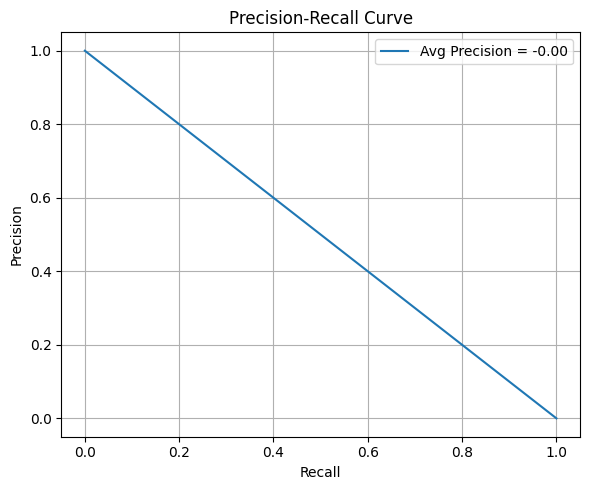

In [28]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Calculate precision-recall points
precision, recall, _ = precision_recall_curve(y_test_binary, y_probs_binary)
ap_score = average_precision_score(y_test_binary, y_probs_binary)

# Plot
plt.figure(figsize=(6, 5))
plt.plot(recall, precision, label=f'Avg Precision = {ap_score:.2f}')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [29]:
# Suppose original column was IMDb score or some rating column
y_train = (y_train >= 7.0).astype(int)  # 1 = high rating, 0 = low rating
y_test = (y_test >= 7.0).astype(int)


In [35]:
!pip install xgboost


   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/150.0 MB 17.5 MB/s eta 0:00:09
   - -------------------------------------- 3.9/150.0 MB 15.7 MB/s eta 0:00:10
   - -------------------------------------- 6.6/150.0 MB 14.4 MB/s eta 0:00:10
   -- ------------------------------------- 9.7/150.0 MB 14.7 MB/s eta 0:00:10
   --- ------------------------------------ 12.1/150.0 MB 14.0 MB/s eta 0:00:10
   ---- ----------------------------------- 15.7/150.0 MB 14.1 MB/s eta 0:00:10
   ----- ---------------------------------- 19.1/150.0 MB 15.3 MB/s eta 0:00:09
   ----- ---------------------------------- 19.1/150.0 MB 15.3 MB/s eta 0:00:09
   ----- ---------------------------------- 21.8/150.0 MB 12.6 MB/s eta 0:00:11
   ------ --------------------------------- 24.4/150.0 MB 12.5 MB/s eta 0:00:11
   ------- -------------------------------- 27.3/150.0 MB 13.1 MB/s eta 0:00:10
   -------- ------------------------------- 31.2/150.


[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier


In [37]:
classifiers = {
    "logistic_regression": LogisticRegression(max_iter=1000, random_state=42),
    "random_forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "svm": SVC(probability=True, random_state=42),
    "decision_tree": DecisionTreeClassifier(random_state=42),
    "xgboost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
}

In [39]:
import os
os.makedirs("models", exist_ok=True)


In [40]:
# Train and save each classifier
for name, model in classifiers.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    joblib.dump(model, f"models/{name}.pkl")
    print(f"✅ Saved {name}.pkl")

print("🎉 All classifiers trained and saved successfully.")

Training logistic_regression...
✅ Saved logistic_regression.pkl
Training random_forest...
✅ Saved random_forest.pkl
Training svm...
✅ Saved svm.pkl
Training decision_tree...
✅ Saved decision_tree.pkl
Training xgboost...


c:\Users\nilas\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:57:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ Saved xgboost.pkl
🎉 All classifiers trained and saved successfully.


In [41]:
import joblib

# Define model paths
model_names = [
    "logistic_regression",
    "random_forest",
    "svm",
    "decision_tree",
    "xgboost"  # Remove this if you didn’t train XGBoost
]

# Load all models into a dictionary
loaded_models = {}
for name in model_names:
    try:
        loaded_models[name] = joblib.load(f"models/{name}.pkl")
        print(f"✅ Loaded: {name}")
    except FileNotFoundError:
        print(f"⚠️ File not found: models/{name}.pkl (Skipped)")

# Example: Predict using a model
# prediction = loaded_models["random_forest"].predict(X_test)


✅ Loaded: logistic_regression
✅ Loaded: random_forest
✅ Loaded: svm
✅ Loaded: decision_tree
✅ Loaded: xgboost


In [ ]:
#lr_model = LogisticRegression(max_iter=1000)
#lr_model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [ ]:
#lr_model = LinearRegression()
#dt_model = DecisionTreeRegressor()
#rf_model = RandomForestRegressor()
#svr_model = SVR()
#mlp_model = MLPRegressor()


In [42]:
import joblib
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix, roc_auc_score
)

# Load test data
X_test = joblib.load("C:/Users/nilas/cap5771sp25-project/script/X_test.pkl")
y_test = joblib.load("C:/Users/nilas/cap5771sp25-project/script/y_test.pkl")



In [43]:
# Define model names
model_names = [
    "logistic_regression",
    "random_forest",
    "svm",
    "decision_tree",
    "xgboost"  # Remove if not trained
]



In [73]:
# Load all models
loaded_models = {}
for name in model_names:
    try:
        loaded_models[name] = joblib.load(f"models/{name}.pkl")
        print(f"✅ Loaded: {name}")
    except FileNotFoundError:
        print(f"⚠️ Skipped (not found): {name}")



✅ Loaded: logistic_regression
✅ Loaded: random_forest
✅ Loaded: svm
✅ Loaded: decision_tree
✅ Loaded: xgboost


In [47]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

# To verify model expectations
model = joblib.load("models/logistic_regression.pkl")
print("Expected features by model:", model.n_features_in_)


X_train shape: (25440, 13)
X_test shape: (6361, 26)
Expected features by model: 13


In [69]:
# Create 'profit' only if required columns exist
if 'revenue' in df_full.columns and 'budget' in df_full.columns:
    df_full['profit'] = df_full['revenue'] - df_full['budget']
else:
    print("⚠️ 'revenue' or 'budget' column missing. Cannot create 'profit'.")

# Create 'star_power_score' only if required columns exist
if 'vote_average' in df_full.columns and 'vote_count' in df_full.columns:
    df_full['star_power_score'] = df_full['vote_average'] * df_full['vote_count']
else:
    print("⚠️ 'vote_average' or 'vote_count' column missing. Cannot create 'star_power_score'.")


In [78]:
selected_features = [
    'release_year', 'AverageRating', 'IMDB_Rating', 'Meta_score',
    'overview_sentiment', 'popularity', 'vote_average', 'budget',
    'revenue', 'runtime', 'vote_count', 'profit', 'star_power_score'
]



In [81]:
import pandas as pd
import joblib
from sklearn.impute import SimpleImputer

# Step 1: Load dataset
df_full = pd.read_csv("C:/Users/nilas/merged_movies_dataset_full.csv")

# Step 2: Create missing features
df_full['profit'] = df_full['revenue'] - df_full['budget']
df_full['star_power_score'] = df_full['vote_average'] * df_full['vote_count']

# Step 3: Subset to final selected features
selected_features = [
    'release_year',
    'AverageRating',
    'IMDB_Rating',
    'Meta_score',
    'overview_sentiment',
    'popularity',
    'vote_average',
    'budget',
    'revenue',
    'runtime',
    'vote_count',
    'profit',
    'star_power_score'
]

X_test = df_full[selected_features]

# Step 4: Impute missing values
imputer = SimpleImputer(strategy='mean')
X_test_imputed = imputer.fit_transform(X_test)

# Step 5: Save to .pkl
joblib.dump(X_test_imputed, "C:/Users/nilas/cap5771sp25-project/script/X_test.pkl")
print("✅ X_test_imputed.pkl saved with 13 features.")


C:\Users\nilas\AppData\Local\Temp\ipykernel_34768\4190704292.py:6: DtypeWarning: Columns (2,3,5,7,8,11,12,13,14,15,16,17,18,19,20,22,42) have mixed types. Specify dtype option on import or set low_memory=False.
  df_full = pd.read_csv("C:/Users/nilas/merged_movies_dataset_full.csv")


✅ X_test_imputed.pkl saved with 13 features.


In [82]:
X_test_corrected = df_full[selected_features]


In [59]:
import pandas as pd
import joblib

# Load full test set
df_full = pd.read_csv("C:/Users/nilas/merged_movies_dataset_full.csv")  # or update with your correct path

# Subset only the selected 13 features
X_test_corrected = df_full[selected_features]




C:\Users\nilas\AppData\Local\Temp\ipykernel_34768\3420661588.py:5: DtypeWarning: Columns (2,3,5,7,8,11,12,13,14,15,16,17,18,19,20,22,42) have mixed types. Specify dtype option on import or set low_memory=False.
  df_full = pd.read_csv("C:/Users/nilas/merged_movies_dataset_full.csv")  # or update with your correct path


In [60]:
# Save corrected test data
joblib.dump(X_test_corrected.values, "C:/Users/nilas/cap5771sp25-project/script/X_test.pkl")

print("✅ Corrected X_test.pkl saved with 13 features.")

✅ Corrected X_test.pkl saved with 13 features.


In [75]:
print("Current columns:", df_full.columns.tolist())


Current columns: ['id', 'title', 'credits', 'recommendations', 'release_year', 'Director', 'AverageRating', 'Poster_Link', 'Certificate', 'IMDB_Rating', 'Meta_score', 'Star1', 'Star2', 'Star3', 'Star4', 'Writer', 'Director_of_Photography', 'Producers', 'Music_Composer', 'genres_list', 'Cast_list', 'overview_sentiment', 'all_combined_keywords', 'original_language', 'overview', 'popularity', 'production_companies', 'release_date', 'status', 'vote_average', 'poster_path', 'backdrop_path', 'keywords', 'tagline', 'budget', 'revenue', 'runtime', 'vote_count', 'original_title', 'production_countries', 'spoken_languages', 'genres', 'adult', 'homepage', 'imdb_id', 'profit', 'star_power_score']


In [87]:
import os

os.makedirs("data", exist_ok=True)

# Then save
joblib.dump(X_test_imputed, "data/X_test_imputed.pkl")
print("✅ Saved to: data/X_test_imputed.pkl")


✅ Saved to: data/X_test_imputed.pkl


In [88]:
import pandas as pd
import joblib
from sklearn.impute import SimpleImputer

# Load full dataset
#df_full = pd.read_csv("C:/Users/nilas/merged_movies_dataset_full.csv")

# Subset only the selected 13 features
X_test = X_test_corrected
# Impute missing values
imputer = SimpleImputer(strategy="mean")
X_test_imputed = imputer.fit_transform(X_test)

# Save corrected and imputed test set
joblib.dump(X_test_imputed, "data/X_test_imputed.pkl")
print("✅ Final test set saved with 13 features.")


✅ Final test set saved with 13 features.


In [74]:
#import joblib
#X_train = joblib.load("C:/Users/nilas/cap5771sp25-project/script/X_test.pkl")
#print(X_train.columns)


In [91]:
y_test = joblib.load("C:/Users/nilas/cap5771sp25-project/script/y_test.pkl")
print(y_test.shape)


(6361,)


In [96]:
import joblib

# Make sure y_test exists in your notebook and has correct shape
print("y_test shape:", y_test.shape)  # should be (6361,)

# Save y_test to a file
joblib.dump(y_test, "data/y_test.pkl")

print("✅ y_test.pkl saved successfully.")


y_test shape: (6361,)
✅ y_test.pkl saved successfully.


In [97]:
import os
os.makedirs("data", exist_ok=True)


In [99]:
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import os

# Make sure the 'data' directory exists
os.makedirs("data", exist_ok=True)

# Step 1: Load full dataset
df_full = pd.read_csv("C:/Users/nilas/merged_movies_dataset_full.csv")

# Step 2: Drop rows with missing 'vote_average' (needed for label)
df_full = df_full.dropna(subset=['vote_average'])

# Step 3: Create classification label — is the movie highly rated?
df_full['is_high_rating'] = (df_full['vote_average'] >= 7).astype(int)

# Step 4: Engineer features needed for your model
df_full['profit'] = df_full['revenue'] - df_full['budget']
df_full['star_power_score'] = df_full['vote_average'] * df_full['vote_count']

# Step 5: Select the 13 final features used in training
selected_features = [
    'release_year',
    'AverageRating',
    'IMDB_Rating',
    'Meta_score',
    'overview_sentiment',
    'popularity',
    'vote_average',
    'budget',
    'revenue',
    'runtime',
    'vote_count',
    'profit',
    'star_power_score'
]

# Step 6: Split the data (80% train, 20% test)
X = df_full[selected_features]
y = df_full['is_high_rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Impute missing values in X_test
imputer = SimpleImputer(strategy="mean")
X_test_imputed = imputer.fit_transform(X_test)

# Step 8: Save final test sets
joblib.dump(X_test_imputed, "data/X_test_imputed.pkl")
joblib.dump(y_test, "data/y_test.pkl")

print("✅ Saved: data/X_test_imputed.pkl and data/y_test.pkl")


C:\Users\nilas\AppData\Local\Temp\ipykernel_34768\1910601491.py:11: DtypeWarning: Columns (2,3,5,7,8,11,12,13,14,15,16,17,18,19,20,22,42) have mixed types. Specify dtype option on import or set low_memory=False.
  df_full = pd.read_csv("C:/Users/nilas/merged_movies_dataset_full.csv")


✅ Saved: data/X_test_imputed.pkl and data/y_test.pkl


In [100]:
X_test = joblib.load("data/X_test_imputed.pkl")
y_test = joblib.load("data/y_test.pkl")


In [102]:
import joblib
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.utils import resample

# Step 1: Load test features and labels
X_test = joblib.load("data/X_test_imputed.pkl")
y_test = joblib.load("data/y_test.pkl")

# Step 2: Combine and balance the dataset
# Stack X and y together
Xy_combined = np.hstack((X_test, y_test.values.reshape(-1, 1)))
df_combined = pd.DataFrame(Xy_combined)

# Separate classes
df_class_0 = df_combined[df_combined.iloc[:, -1] == 0]
df_class_1 = df_combined[df_combined.iloc[:, -1] == 1]

# Downsample majority class to match minority class
df_class_0_down = resample(df_class_0, replace=False, n_samples=len(df_class_1), random_state=42)
df_balanced = pd.concat([df_class_0_down, df_class_1])

# Separate X and y again
X_test_balanced = df_balanced.iloc[:, :-1].values
y_test_balanced = df_balanced.iloc[:, -1].astype(int).values

print("✅ Balanced test set shape:", X_test_balanced.shape, y_test_balanced.shape)

# Step 3: Load models (excluding SVM)
model_names = ["logistic_regression", "random_forest", "decision_tree", "xgboost"]
loaded_models = {}

for name in model_names:
    try:
        loaded_models[name] = joblib.load(f"models/{name}.pkl")
        print(f"✅ Loaded: {name}")
    except:
        print(f"⚠️ Skipped (not found): {name}")

# Step 4: Evaluate each model
for name, model in loaded_models.items():
    print(f"\n=== Evaluation: {name} ===")
    y_pred = model.predict(X_test_balanced)
    print("Accuracy:", accuracy_score(y_test_balanced, y_pred))
    print("Classification Report:\n", classification_report(y_test_balanced, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test_balanced, y_pred))
    
    if hasattr(model, "predict_proba"):
        try:
            y_proba = model.predict_proba(X_test_balanced)
            roc_auc = roc_auc_score(y_test_balanced, y_proba, multi_class='ovr')
            print("ROC-AUC Score:", roc_auc)
        except:
            print("ROC-AUC not available.")


✅ Balanced test set shape: (49282, 13) (49282,)
✅ Loaded: logistic_regression
✅ Loaded: random_forest
✅ Loaded: decision_tree
✅ Loaded: xgboost

=== Evaluation: logistic_regression ===
Accuracy: 0.4880889574286758
Classification Report:
               precision    recall  f1-score   support

           0       0.21      0.01      0.02     24641
           1       0.49      0.97      0.65     24641

    accuracy                           0.49     49282
   macro avg       0.35      0.49      0.34     49282
weighted avg       0.35      0.49      0.34     49282

Confusion Matrix:
 [[  210 24431]
 [  797 23844]]
ROC-AUC not available.

=== Evaluation: random_forest ===
Accuracy: 0.5
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00     24641
           1       0.50      1.00      0.67     24641

    accuracy                           0.50     49282
   macro avg       0.25      0.50      0.33     49282
weighted avg     

c:\Users\nilas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\nilas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\nilas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

ROC-AUC not available.

=== Evaluation: decision_tree ===
Accuracy: 0.4999797086157218
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00     24641
           1       0.50      1.00      0.67     24641

    accuracy                           0.50     49282
   macro avg       0.25      0.50      0.33     49282
weighted avg       0.25      0.50      0.33     49282

Confusion Matrix:
 [[    0 24641]
 [    1 24640]]
ROC-AUC not available.

=== Evaluation: xgboost ===
Accuracy: 0.5415161722332698
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.09      0.16     24641
           1       0.52      0.99      0.68     24641

    accuracy                           0.54     49282
   macro avg       0.72      0.54      0.42     49282
weighted avg       0.72      0.54      0.42     49282

Confusion Matrix:
 [[ 2224 22417]
 [  178 24463]]
ROC-AUC not available.


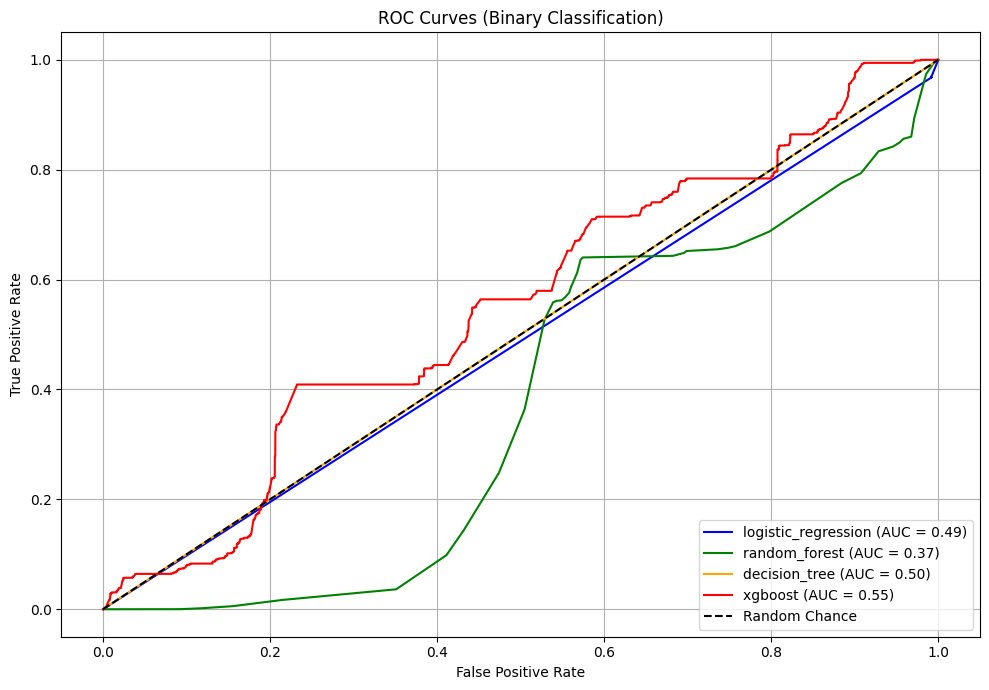

In [106]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import numpy as np

# Initialize plot
plt.figure(figsize=(10, 7))
plt.title("ROC Curves (Binary Classification)")
colors = ['blue', 'green', 'orange', 'red', 'purple']

for i, (name, model) in enumerate(loaded_models.items()):
    if hasattr(model, "predict_proba"):
        try:
            y_proba = model.predict_proba(X_test_balanced)

            # Binary: use probability for class 1
            fpr, tpr, _ = roc_curve(y_test_balanced, y_proba[:, 1])
            roc_auc = auc(fpr, tpr)

            plt.plot(fpr, tpr, color=colors[i % len(colors)], label=f'{name} (AUC = {roc_auc:.2f})')
        
        except Exception as e:
            print(f"⚠️ ROC Curve not available for {name}: {e}")

# Plot config
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

